In [1]:
import easyocr
import cv2
import numpy as np
import pytesseract
from pytesseract import Output
from matplotlib import pyplot as plt
from glob import glob
import os
import re
import copy
import math
import time
import pandas as pd
import imutils

reader = easyocr.Reader(['en','ko'], gpu=True)

In [2]:
workdir = ""

filelist = []

for (root, directories, files) in os.walk(workdir):
    for file in files:
        if '.jpg' in file.lower():
            file_path = os.path.join(root, file)
            filelist.append(file_path)
        if '.jpeg' in file.lower():
            file_path = os.path.join(root, file)
            filelist.append(file_path)
            
# filelist

C:\Users\smcljy\.conda\envs\dlml\lib\site-packages\torch\nn\functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  ..\c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


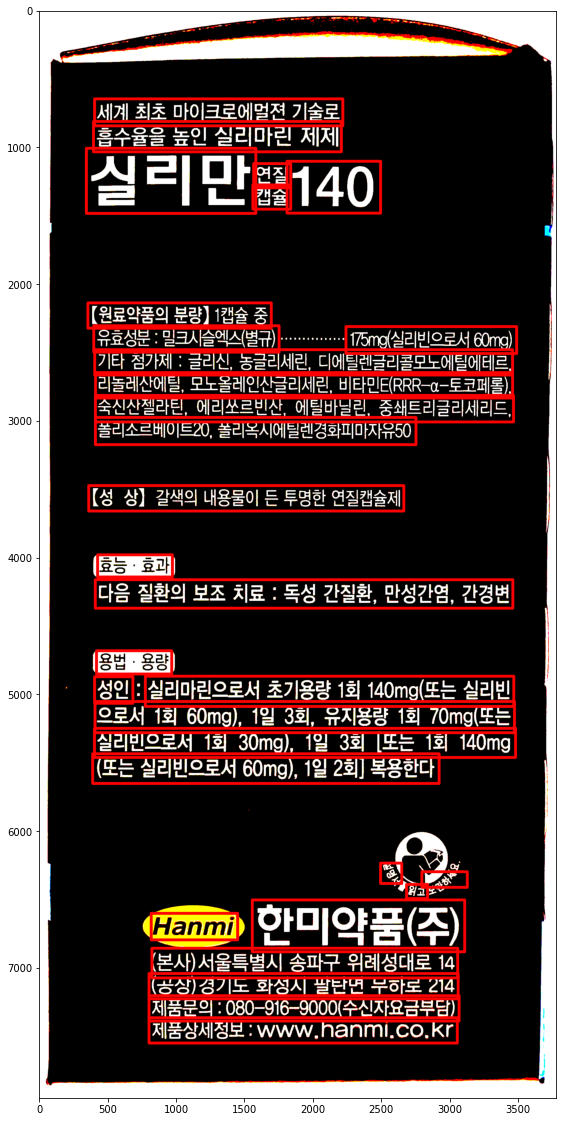

In [3]:
img = cv2.imread(filelist[6])

ret, img = cv2.threshold(img, 155,255, cv2.THRESH_BINARY_INV)
bbx = cv2.resize(img, dsize=(0,0), fx=2.1, fy=2.075, interpolation=cv2.INTER_LINEAR)

result = reader.readtext(bbx,adjust_contrast=0.3,width_ths=0.7)#))

for (bbox, text, prob) in result: 
  # unpack the bounding box
  (tl, tr, br, bl) = bbox
  tl = (int(tl[0]), int(tl[1]))
  tr = (int(tr[0]), int(tr[1]))
  br = (int(br[0]), int(br[1]))
  bl = (int(bl[0]), int(bl[1]))
  cv2.rectangle(bbx, tl, br, (255, 0, 0), 20)
#   cv2.putText(bbx, text, (tl[0]-25, tl[1]+15),
#     cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 0, 0), 2)
  # texts.pytesseract.image_to_string(bbx[tl[1]:br[1], tl[0]:br[0]],config=configs).split())plit())
plt.rcParams['figure.figsize'] = (20,20)
plt.imshow(bbx)

In [4]:
# detection box 상단부터 정렬
result = sorted(result, key=lambda x: (x[0][0][1]))
result

[([[406, 649], [2221, 649], [2221, 846], [406, 846]],
  '세계 최초 마이크로에서전 기술로',
  0.3653065779168552),
 ([[398, 814], [2210, 814], [2210, 1036], [398, 1036]],
  '훔수울올 높인 실리마린 제제',
  0.46475234902340695),
 ([[346, 1010], [1585, 1010], [1585, 1486], [346, 1486]],
  '실리만',
  0.9999123168084034),
 ([[1813, 1105], [2497, 1105], [2497, 1484], [1813, 1484]],
  '140',
  0.9007036373730057),
 ([[1569, 1122], [1840, 1122], [1840, 1299], [1569, 1299]],
  '연질',
  0.9989213797239277),
 ([[1563, 1278], [1840, 1278], [1840, 1455], [1563, 1455]],
  '캠술',
  0.8006428479673483),
 ([[357, 2140], [1698, 2140], [1698, 2325], [357, 2325]],
  '[원로약품의 분량] 1캠술 중',
  0.4174229069004305),
 ([[400, 2307], [1755, 2307], [1755, 2500], [400, 2500]],
  '유요성분 : 밀코시슬렉스별규)',
  0.3579223858296748),
 ([[2244, 2313], [3492, 2313], [3492, 2510], [2244, 2510]],
  'ITSmgl실리반으로서 6Omg)',
  0.33844198317928165),
 ([[407, 2482], [3462, 2482], [3462, 2667], [407, 2667]],
  '기타 철가제 : 글리신 농글리세린 디에탤런글리올모노에털에터로',
  0.08036470123089716),


In [5]:
result_text = []

for result in result:
    result_text.append(result[1])

result_text

df = pd.DataFrame(result_text)

df

,0
0,세계 최초 마이크로에서전 기술로
1,훔수울올 높인 실리마린 제제
2,실리만
3,140
4,연질
5,캠술
6,[원로약품의 분량] 1캠술 중
7,유요성분 : 밀코시슬렉스별규)
8,ITSmgl실리반으로서 6Omg)
9,기타 철가제 : 글리신 농글리세린 디에탤런글리올모노에털에터로
